In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = [(i, random.random() * 3 + i + 5) for i in range(1, 31)]
data

[(1, 6.626545154152233),
 (2, 7.09850671229607),
 (3, 9.441547818087322),
 (4, 11.491441517793632),
 (5, 10.663511279753168),
 (6, 13.740938289865344),
 (7, 13.941143567040893),
 (8, 13.061111870978566),
 (9, 15.356044053064092),
 (10, 15.453892271396995),
 (11, 17.78602891785747),
 (12, 17.38681869534983),
 (13, 20.506883722531967),
 (14, 19.151482812873603),
 (15, 20.610059673570305),
 (16, 21.11610427346588),
 (17, 24.43391670288913),
 (18, 23.425021069649123),
 (19, 25.422979677046794),
 (20, 25.496475810963975),
 (21, 26.3180669469829),
 (22, 28.822069569502354),
 (23, 30.884800353988886),
 (24, 30.837524075706487),
 (25, 32.024701155160756),
 (26, 31.99816784390925),
 (27, 34.85996711905764),
 (28, 34.4971112598315),
 (29, 36.124615965533735),
 (30, 36.04028683418452)]

In [3]:
# зададим Y и X
Y = [d[1] for d in data]
X = np.vstack((np.array([d[0] for d in data]), np.ones(30))).T

# Вычислим згачение функции потерь
def loss_function(a, b):
    sum = np.sum((Y - np.dot(X, [a, b]))**2)
    return sum

# Вычислим градиент
def df(a0, b0):
    point = np.random.randint(1, len(data))
    grad_a = -2 * (Y[point] - np.dot(X[point], [a0, b0])) * X[point, 0]
    grad_b = -2 * (Y[point] - np.dot(X[point], [a0, b0]))
    return np.array([grad_a, grad_b])


# определение итерации градиентного спуска
w0 = np.array([0, 0])
res = []
learning_rate = 0.00001

# Реализуем стохастический градиентный спуск
while True:
    res.append(w0)
    w1 = w0 - learning_rate * df(*w0)
    if np.linalg.norm(w1 - w0) < 0.0001:
        break    
    w0 = w1
    
def Dynamic(w):
    # реализация функции Dynamic w 
    return w

result = Dynamic(w0)
result

array([1.22641695, 0.07555352])

In [4]:
# Решение МНК через нормальное уравнение
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
theta_best

array([1.02374575, 5.95253304])

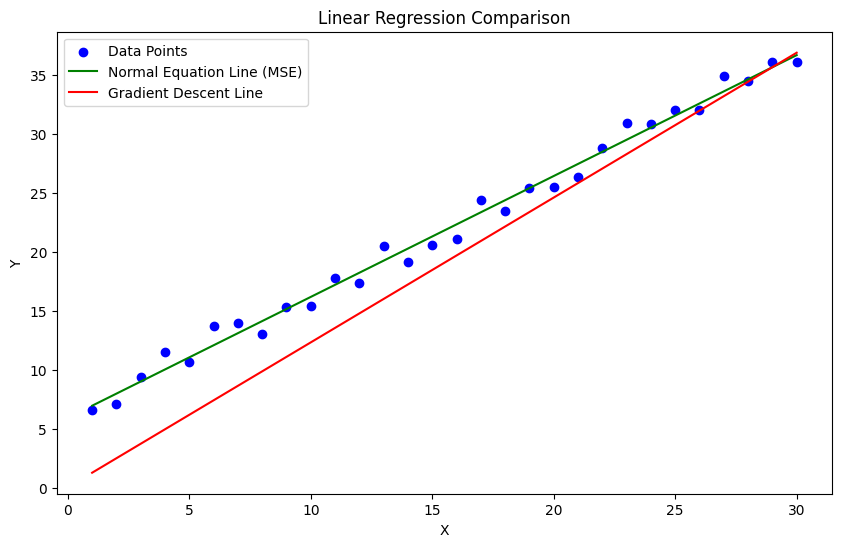

In [6]:
# График
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Data Points')
plt.plot(X[:, 0], X.dot(theta_best), color='green', label='Normal Equation Line (MSE)')
plt.plot(X[:, 0], X.dot(res[-1]), color='red', label='Gradient Descent Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Comparison')
plt.legend()
plt.show()